In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:/Users/Kate/Downloads/LTV_dataframe.csv')
df.sort_index(ascending=True)
df.head()

,user_id,event_timestamp,first_purchase_time,cohort_week,lifetime_weeks,purchase,rev_per_cohort,users_per_cohort,simple_ltv,advanced_ltv,cohort_month
0,6f8592c0-fb4c-47dc-9344-424eb5d88a4b,2023-10-13 09:54:02,2023-10-13 09:54:02,2023-10-08 00:00:00,0,2.49,2.49,1,2.4900,0.327494,2023-10
1,95287b91-85af-4174-9986-aeafb3853bb6,2023-10-14 04:45:14,2023-03-25 04:44:40,2023-03-19 00:00:00,29,2.49,1411.83,84,16.8075,185.689222,2023-03
2,95287b91-85af-4174-9986-aeafb3853bb6,2023-03-25 04:44:40,2023-03-25 04:44:40,2023-03-19 00:00:00,0,2.49,1411.83,84,16.8075,185.689222,2023-03
3,95287b91-85af-4174-9986-aeafb3853bb6,2023-04-01 04:44:16,2023-03-25 04:44:40,2023-03-19 00:00:00,1,2.49,1411.83,84,16.8075,185.689222,2023-03
4,95287b91-85af-4174-9986-aeafb3853bb6,2023-04-08 04:45:55,2023-03-25 04:44:40,2023-03-19 00:00:00,2,2.49,1411.83,84,16.8075,185.689222,2023-03


In [3]:
df2 = pd.read_csv('C:/Users/Kate/Downloads/LTV_dataframe2.csv')
df2.head()

,user_id,event_timestamp,first_purchase_time,cohort_week,lifetime_weeks,purchase,rev_per_cohort,LTV,ARPU,LTV2,LTV2_pred
0,6f8592c0-fb4c-47dc-9344-424eb5d88a4b,2023-10-13 09:54:02,2023-10-13 09:54:02,2023-10-08,0,2.49,2.49,134.069439,16.22,0.00,-0.00
1,95287b91-85af-4174-9986-aeafb3853bb6,2023-10-14 04:45:14,2023-03-25 04:44:40,2023-03-19,29,2.49,1411.83,134.069439,16.22,470.38,470.38
2,95287b91-85af-4174-9986-aeafb3853bb6,2023-03-25 04:44:40,2023-03-25 04:44:40,2023-03-19,0,2.49,1411.83,134.069439,16.22,0.00,-0.00
3,95287b91-85af-4174-9986-aeafb3853bb6,2023-04-01 04:44:16,2023-03-25 04:44:40,2023-03-19,1,2.49,1411.83,134.069439,16.22,16.22,16.22
4,95287b91-85af-4174-9986-aeafb3853bb6,2023-04-08 04:45:55,2023-03-25 04:44:40,2023-03-19,2,2.49,1411.83,134.069439,16.22,32.44,32.44


In [4]:
# Convert time column to datetime type 
df['event_timestamp'] = pd.to_datetime(df['event_timestamp'])
df['first_purchase_time'] = pd.to_datetime(df['first_purchase_time'])
df['cohort_month'] = pd.to_datetime(df['cohort_month'])
df['cohort_week'] = pd.to_datetime(df['cohort_week'])

df2['event_timestamp'] = pd.to_datetime(df2['event_timestamp'])
df2['first_purchase_time'] = pd.to_datetime(df2['first_purchase_time'])
#df2['cohort_month'] = pd.to_datetime(df2['cohort_month'])
df2['cohort_week'] = pd.to_datetime(df2['cohort_week'])

In [41]:
df_snip = df.groupby(['cohort_week'])[['advanced_ltv', 'simple_ltv']].mean().reset_index()
df_snip.head()

,cohort_week,advanced_ltv,simple_ltv
0,2023-02-26,53.709052,20.418000
1,2023-03-05,209.268806,18.080795
2,2023-03-12,160.144673,17.646522
3,2023-03-19,185.689222,16.807500
4,2023-03-26,122.810332,18.675000


In [42]:
simple_ltv = df_snip['simple_ltv'].sort_index(ascending=True)
advanced_ltv = df_snip['advanced_ltv'].sort_index(ascending=True)
cohort_week = df_snip['cohort_week']

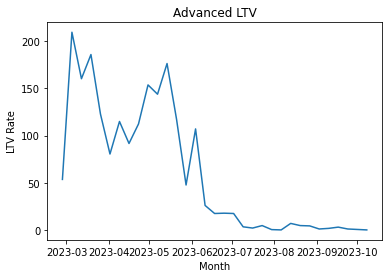

<Figure size 1440x1080 with 0 Axes>

In [43]:
#plt.plot(cohort_week, simple_ltv, '-') 
plt.plot(cohort_week, advanced_ltv, '-') 
plt.xlabel("Month")
plt.ylabel("LTV Rate")
plt.title('Advanced LTV')
plt.figure(figsize=(20,15))
plt.show()

In [44]:
df_snip2 = df2.groupby(['cohort_week'])[['LTV2', 'LTV2_pred']].mean().reset_index()
df_snip2.head()

,cohort_week,LTV2,LTV2_pred
0,2023-02-26,170.903415,170.903415
1,2023-03-05,144.304695,144.304695
2,2023-03-12,143.525440,143.525440
3,2023-03-19,142.661623,142.661623
4,2023-03-26,134.820640,134.820640


In [45]:
LTV2 = df_snip2['LTV2'].sort_index(ascending=True)
LTV2_pred = df_snip2['LTV2_pred']
cohort_week = df_snip2['cohort_week']

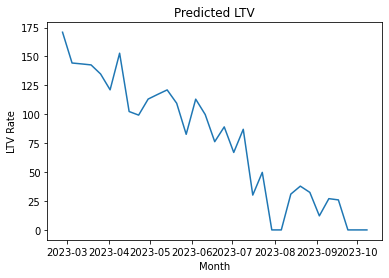

<Figure size 1440x1080 with 0 Axes>

In [46]:
#plt.plot(cohort_week, LTV2, '-')
plt.plot(cohort_week, LTV2_pred, '-')
plt.xlabel("Month")
plt.ylabel("LTV Rate")
plt.title('Predicted LTV')
plt.figure(figsize=(20,15))
plt.show()

In [47]:
retention_matrix = pd.read_csv('C:/Users/Kate/Downloads/Retention_matrix.csv')
retention_matrix.head()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,1.0,0.600000,0.500000,0.500000,0.400000,0.350000,0.200000,0.350000,0.300000,0.200000,...,0.150000,0.150000,0.150000,0.150000,0.100000,0.050000,0.10000,0.100000,0.050000,0.100000
1,1.0,0.597938,0.474227,0.419244,0.360825,0.302405,0.288660,0.278351,0.243986,0.213058,...,0.113402,0.099656,0.085911,0.079038,0.079038,0.079038,0.04811,0.030928,0.020619,0.006873
2,1.0,0.559259,0.440741,0.344444,0.311111,0.329630,0.281481,0.262963,0.251852,0.237037,...,0.066667,0.066667,0.040741,0.033333,0.011111,NaN,NaN,NaN,NaN,NaN
3,1.0,0.568376,0.440171,0.393162,0.384615,0.311966,0.294872,0.269231,0.269231,0.247863,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,0.680556,0.583333,0.486111,0.444444,0.444444,0.388889,0.361111,0.333333,0.305556,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


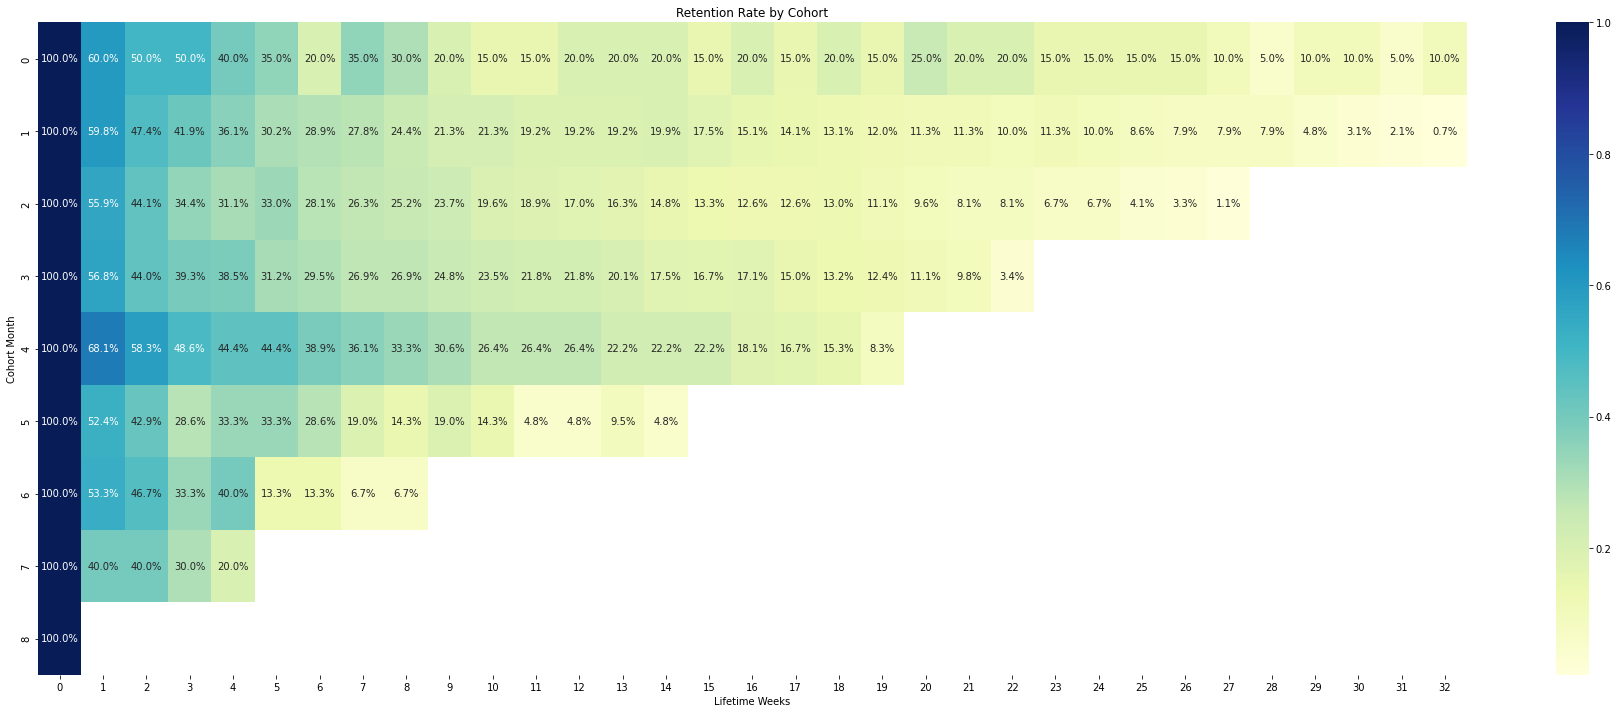

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot heatmap
plt.figure(figsize=(32, 12))
sns.heatmap(retention_matrix, annot=True, fmt=".1%", cmap='YlGnBu') 
plt.title('Retention Rate by Cohort')
plt.xlabel('Lifetime Weeks')
plt.ylabel('Cohort Month')
plt.show()

In [49]:
rev_snip = df.groupby(['cohort_month'])[['rev_per_cohort']].sum().reset_index()
rev_snip.head()

cohort_month = rev_snip['cohort_month'].sort_index(ascending=True)
rev_per_cohort = rev_snip['rev_per_cohort']

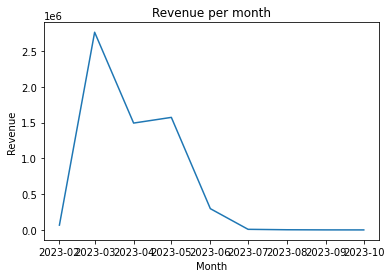

<Figure size 1440x1080 with 0 Axes>

In [50]:
plt.plot(cohort_month, rev_per_cohort, '-')  
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.title('Revenue per month')
plt.figure(figsize=(20,15))
plt.show()

In [33]:
rev_snip2 = df.groupby(['cohort_week'])[['rev_per_cohort']].sum().reset_index()
rev_snip.head()

cohort_week = rev_snip2['cohort_week'].sort_index(ascending=True)
rev_per_cohort = rev_snip2['rev_per_cohort']

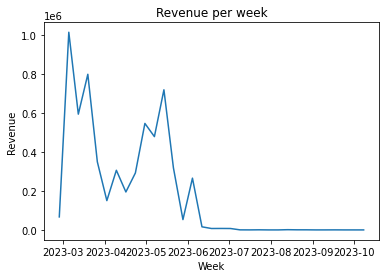

<Figure size 1440x1080 with 0 Axes>

In [34]:
plt.plot(cohort_week, rev_per_cohort, '-')  
plt.xlabel("Week")
plt.ylabel("Revenue")
plt.title('Revenue per week')
plt.figure(figsize=(20,15))
plt.show()

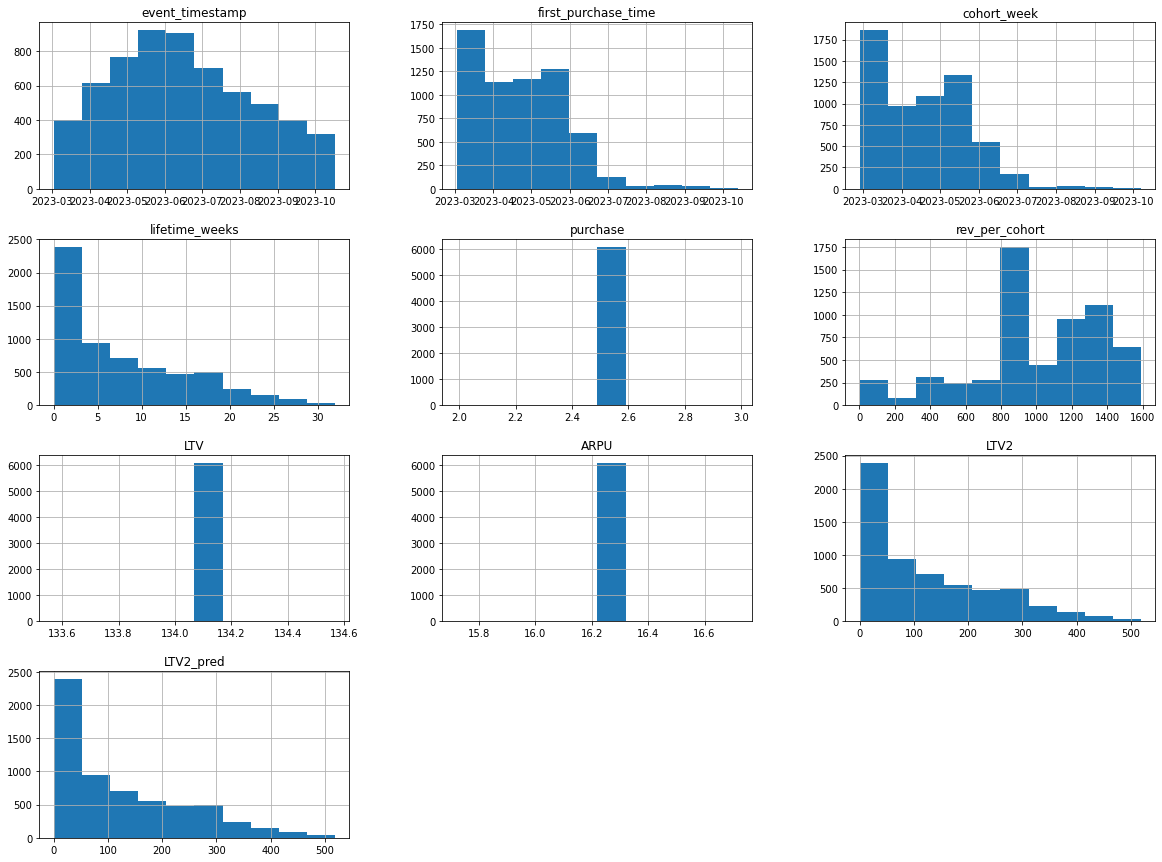

In [52]:
df2.hist(bins=10, figsize=(20,15))
plt.savefig('attribute_histogram_plots')
plt.show()